# AI-Driven Pneumonia Prediction: A Data-Centric Approach Using Machine Learning.

Pneumonia remains a leading cause of morbidity and mortality worldwide, making early
detection and prediction is crucial for improving patient outcomes. This research
explores the application of artificial intelligence (AI) in pneumonia prediction using
structured clinical datasets. By leveraging machine learning techniques, the study aims
to develop a predictive model capable of identifying pneumonia risk based on patient
demographics, symptoms, laboratory results, and other relevant features. Various
machine learning algorithms, such as decision trees, support vector machines, and
deep learning models, will be evaluated for performance. The study will also review
existing AI-driven pneumonia prediction models and benchmark their effectiveness. This
research seeks to contribute to AI's role in clinical decision support systems, enhancing
diagnostic accuracy and facilitating timely interventions in healthcare settings.

### importing libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [2]:
# Load the dataset
df = pd.read_csv("NACef_Data.csv")
df.head()

,record_id,age,gender,height,weight,bmi,admission_date,health_work,rural_work,geriatric_home,...,clinical_resp,failure_cause,treatm_fail_cause,secund_infec,non_pulm_infec,date_non_pulmonar,cv_comp,cv,another_study,which_study
0,1,81,0.0,153.0,50.0,0.002136,2199-12-08,0,0,0,...,2.0,NaN,NaN,NaN,1.0,6.0,0.0,NaN,0.0,NaN
1,2,25,0.0,154.0,55.0,0.002319,2200-01-02,0,0,0,...,2.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2,3,80,1.0,180.0,80.0,0.002469,2200-01-07,0,0,0,...,2.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3,4,69,1.0,171.0,60.0,0.002052,2200-01-10,0,0,0,...,2.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN
4,5,>90,1.0,168.0,75.0,0.002657,2200-01-07,0,1,0,...,2.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN


In [3]:
# class to describe dataset

class Describer:
    
    # initialize object
    def __init__(self, df):
        self.df = df
        
    # method to check shape of data
    def shape(self):
        out = print(f"The DataFrame has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns", '\n')
        return out
    
    # method to check info on dataset
    def data_info(self):
        out = print(self.df.info(), '\n')
        return out
    
    # method to describe numerical columns
    def data_describe(self):
        out = self.df.describe()
        return out

In [4]:
# creating an instance of the class describer
describe_df = Describer(df)

# lets view the shape of the data
describe_df.shape()

The DataFrame has:
	* 768 rows
	* 83 columns 



In [5]:
# lets print summary infomation on the dataset
print('Summary infomation on dataset')
print('-----------------------------------------------')
describe_df.data_info()

Summary infomation on dataset
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 83 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             768 non-null    int64  
 1   age                   768 non-null    object 
 2   gender                767 non-null    float64
 3   height                407 non-null    object 
 4   weight                490 non-null    float64
 5   bmi                   404 non-null    float64
 6   admission_date        763 non-null    object 
 7   health_work           768 non-null    int64  
 8   rural_work            768 non-null    int64  
 9   geriatric_home        768 non-null    int64  
 10  postramiento          768 non-null    int64  
 11  living_space          768 non-null    int64  
 12  vac_influenza         705 non-null    float64
 13  date_vac_influenza    10 non-null     float64
 

### Summary of Data Understanding
The dataset has 768 rows and 83 columns, which main diagnosis as the target column.
Data Cleaning has to be applied extensively to ensure the correct data is fed into the model.

## 3. Data Preparation
Introduction
We will be preparing our data for analysis by checking for attributes such as;

- Missing values
- Duplicates
- Data inconsistencies.

### 3.1 missing values

In [6]:
# function to display missing values

def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = ((data.isnull().sum() / len(data)) * 100).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_values(df)

,Missing Values,Percentage(%)
date_vac_neumo_2,768,100.000000
vac_neumo_type,768,100.000000
mdr,767,99.869792
date_vac_influenza,758,98.697917
date_infec,746,97.135417
...,...,...
etio_pneumo,2,0.260417
gender,1,0.130208
prev_infec,1,0.130208
ant_taba,1,0.130208


In [7]:
# Drop columns with more than 50% missing values
df = df.dropna(thresh=len(df) * 0.5, axis=1)
missing_values(df)

,Missing Values,Percentage(%)
bmi,364,47.395833
height,361,47.005208
ab_empiric_2,321,41.796875
comorbid,319,41.536458
weight,278,36.197917
days_ab,241,31.380208
icu,234,30.468750
etio_pneumo_patogen,163,21.223958
another_study,134,17.447917
extub,120,15.625000


In [8]:
df.columns

Index(['record_id', 'age', 'gender', 'height', 'weight', 'bmi',
       'admission_date', 'health_work', 'rural_work', 'geriatric_home',
       'postramiento', 'living_space', 'vac_influenza', 'vac_neumococo',
       'prev_infec', 'urg_12_month', 'ab_12month', 'comorbid', 'copd',
       'ant_taba', 'icu', 'ant_mdrd', 'sosp_covid', 'vac_covid', 'criteria',
       'sev_criteria', 'admission_sofa', 'admission_curb', 'admission_psi',
       'hosp_stay', 'ab_empiric', 'ab_empiric_2', 'ab_conjug', 'coinfection',
       'sofa_72', 'etio_pneumo', 'etio_pneumo_patogen', '2_rt_pcr_covid',
       'extub', 'dicharge_date', 'live_discharge', 'main_diagnosis', 'days_ab',
       'ventilation', 'clinical_resp', 'non_pulm_infec', 'cv_comp',
       'another_study'],
      dtype='object')

In [9]:
# dropping unnecesary columns
columns_to_drop = ['record_id', 'admission_date']
df = df.drop(columns=columns_to_drop)

# dropping missing values in main diagnosis
df = df.dropna(subset=['main_diagnosis'])

In [10]:
df['age'] = df['age'].replace('>90', '90')  # Replace '>90' with '90'
df['height'] = df['height'].replace('>184', '184')
df['age'] = df['age'].astype(int)
df['height'] = df['height'].astype(float)
df['main_diagnosis'] = df['main_diagnosis'].astype(int)

In [11]:
# Fill missing values: numerical with median, categorical with mode
for col in df.select_dtypes(include=["number"]).columns:
    df[col].fillna(df[col].median(), inplace=True)
for col in df.select_dtypes(include=["object"]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
# confirming missing values are gone
missing_values(df)

,Missing Values,Percentage(%)


### 3.2 duplicates

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 745 entries, 0 to 767
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  745 non-null    int32  
 1   gender               745 non-null    float64
 2   height               745 non-null    float64
 3   weight               745 non-null    float64
 4   bmi                  745 non-null    float64
 5   health_work          745 non-null    int64  
 6   rural_work           745 non-null    int64  
 7   geriatric_home       745 non-null    int64  
 8   postramiento         745 non-null    int64  
 9   living_space         745 non-null    int64  
 10  vac_influenza        745 non-null    float64
 11  vac_neumococo        745 non-null    float64
 12  prev_infec           745 non-null    float64
 13  urg_12_month         745 non-null    float64
 14  ab_12month           745 non-null    float64
 15  comorbid             745 non-null    object 


- There are no duplicates

In [15]:
df['main_diagnosis'].value_counts()

main_diagnosis
1    729
7     10
8      2
3      2
6      1
2      1
Name: count, dtype: int64

In [16]:
df = df[(df['main_diagnosis'] != 6) & (df['main_diagnosis'] != 2)]

In [17]:
df['main_diagnosis'].value_counts()

main_diagnosis
1    729
7     10
8      2
3      2
Name: count, dtype: int64

In [18]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Label Encode categorical variables
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [19]:
#matching_rows = df[df.isin(['Hypertension']).any(axis=1)]

#print(matching_rows)


## 4. Data Preprocessing
- train test split
- standardizing numerical features
- SMOTE
- PCA

### 4.1 Train-test split

In [20]:
X = df.drop(columns=["main_diagnosis"])  
y = df["main_diagnosis"]

In [21]:
from sklearn.preprocessing import LabelEncoder

le_target = LabelEncoder()
y = le_target.fit_transform(y)


In [22]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 4.2 Standardizing

In [23]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4.3 SMOTE

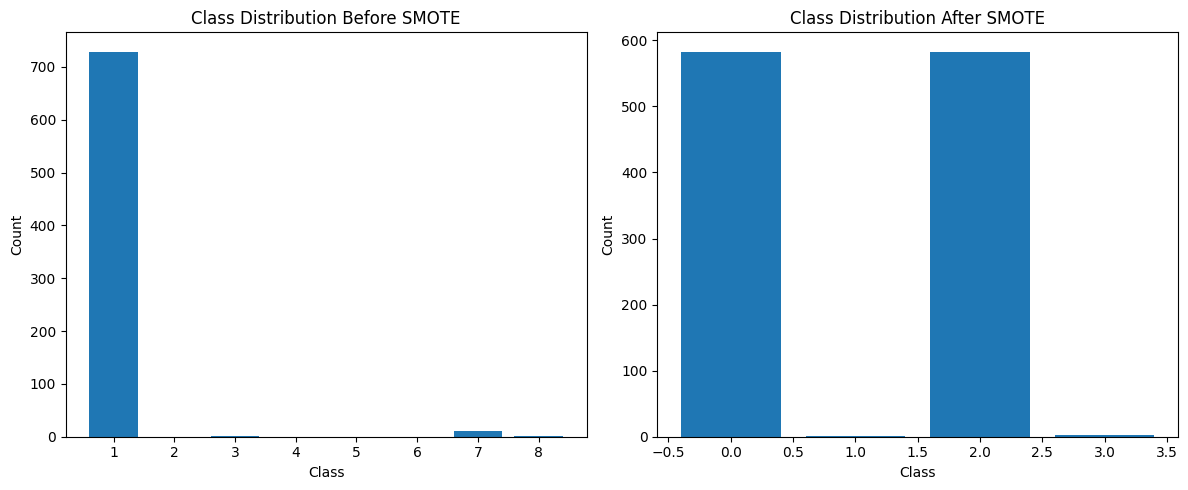

In [24]:
# Class distribution before SMOTE
class_counts_before = df['main_diagnosis'].value_counts()

# Apply SMOTE to balance the classes
smote = BorderlineSMOTE(random_state=42, k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Class distribution after SMOTE
df_resampled = pd.DataFrame({'main_diagnosis': y_train_resampled})
class_counts_after = df_resampled['main_diagnosis'].value_counts()

# Plot class distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
axes[0].bar(class_counts_before.index, class_counts_before.values)
axes[0].set_title('Class Distribution Before SMOTE')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# After SMOTE
axes[1].bar(class_counts_after.index, class_counts_after.values)
axes[1].set_title('Class Distribution After SMOTE')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


### 4.4 Apply PCA
Reduce dimensionality to retain 95% of variance

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)


## 5. Train and Evaluate Models
Train these three models:

- Logistic Regression
- Random Forest
- XGBoost
  
then evaluate them using accuracy and classification report

In [26]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train_pca, y_train_resampled)
    y_pred = model.predict(X_test_pca)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Performance:
Accuracy: 0.9328859060402684
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       146
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2

    accuracy                           0.93       149
   macro avg       0.33      0.32      0.32       149
weighted avg       0.96      0.93      0.95       149


Random Forest Performance:
Accuracy: 0.9664429530201343
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       146
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2

    accuracy                           0.97       149
   macro avg       0.33      0.33      0.33       149
weighted avg       0.96      0.97      0.96       149


XGBoost Performance:
Accuracy: 0.9798657718120806
Classification Repo

### Model Performance Comparison

| Model               | Accuracy | Precision (Weighted Avg) | Recall (Weighted Avg) | F1-Score (Weighted Avg) |
|---------------------|----------|---------------------------|------------------------|--------------------------|
| **Logistic Regression** | 0.933    | 0.96                      | 0.93                   | 0.95                     |
| **Random Forest**       | 0.966    | 0.96                      | 0.97                   | 0.96                     |
| **XGBoost**             | 0.980    | 0.96                      | 0.98                   | 0.97                     |

**Notes:**
- All models perform well on the dominant class (label 0), but fail to capture the minority classes (labels 1 and 2).
- XGBoost has the **highest overall accuracy and F1-score**, indicating the best performance on this imbalanced dataset.
- Consider resampling or class weighting strategies to improve prediction of minority classes.


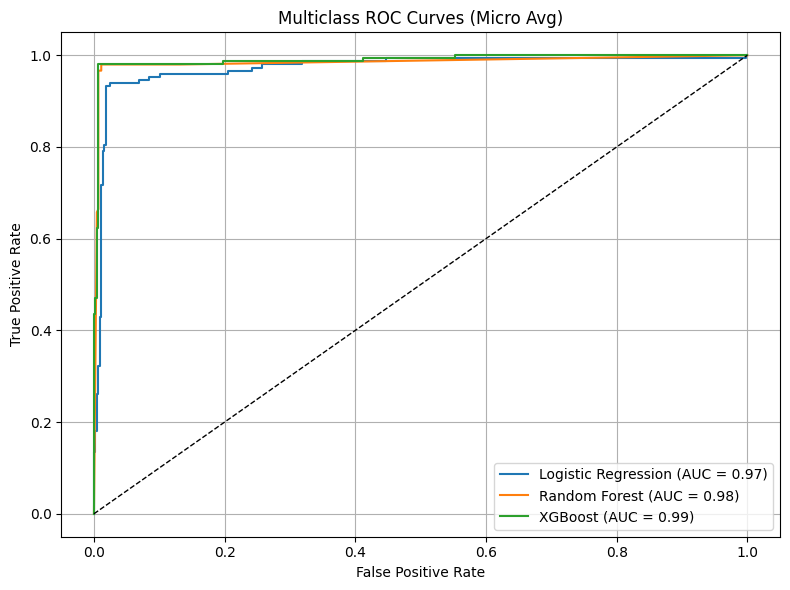

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import numpy as np

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Prepare a plot

plt.figure(figsize=(8, 6))

for name, model in models.items():
    if name == "XGBoost":
        # Train directly
        model.fit(X_train_pca, y_train_resampled)
        y_score = model.predict_proba(X_test_pca)
    else:
        # Wrap others in OneVsRest
        classifier = OneVsRestClassifier(model)
        classifier.fit(X_train_pca, y_train_resampled)
        y_score = classifier.predict_proba(X_test_pca)
    
    # Binarize labels
    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    n_classes = y_test_bin.shape[1]

    # Compute ROC and AUC
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Micro-average
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.plot(fpr["micro"], tpr["micro"], label=f'{name} (AUC = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves (Micro Avg)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show();


## Explainability

Explainability ensures that clinicians and stakeholders can understand and trust the model’s predictions. In healthcare, black-box models are often unacceptable without clear insights into feature contributions. Explainability can:

1. Highlight key clinical factors influencing pneumonia risk.

2. Validate model reasoning against known medical knowledge

3. Support ethical AI deployment and decision accountability

### Explainability When Using PCA
- PCA was used mainly for dimensionality reduction and Visualizing complex data in 2D/3D.
- Each principal component (PC) is a linear combination of original features. So instead of interpreting features directly, you interpret which original features contribute most to each PC.

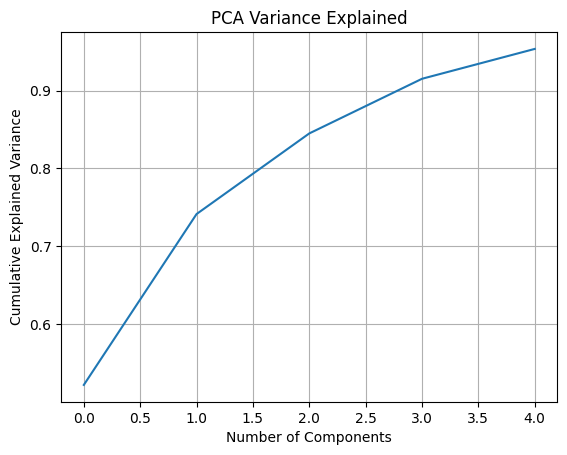

In [29]:
# Plot Variance Explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Explained')
plt.grid(True)
plt.show();


- Above we can clearly see that components explains 95% of the variance.

In [32]:
# Each component has loadings that tell you which original features contribute most.
components = pd.DataFrame(pca.components_, columns=X.columns)
components # View first few principal components


,age,gender,height,weight,bmi,health_work,rural_work,geriatric_home,postramiento,living_space,...,2_rt_pcr_covid,extub,dicharge_date,live_discharge,days_ab,ventilation,clinical_resp,non_pulm_infec,cv_comp,another_study
0,-0.121240,-0.001574,-0.021244,0.020380,5.220428e-07,-0.000011,0.000016,-0.000282,-0.000229,-0.000088,...,0.003278,0.007394,0.020336,0.003393,0.025298,0.004025,0.002076,-0.001534,-0.001266,-0.001178
1,0.128042,-0.001098,-0.019652,-0.001038,7.889181e-07,0.000021,-0.000005,0.000257,0.000252,0.000014,...,-0.000737,0.001280,0.019052,-0.003309,0.017187,0.004172,-0.001383,0.000660,0.001701,-0.000239
2,-0.105906,0.002991,0.066079,0.044895,1.924686e-06,0.000091,0.000150,0.000167,-0.000048,0.000094,...,-0.009568,-0.017031,-0.223175,-0.001458,-0.073055,-0.013596,-0.000606,0.000504,0.001680,0.002976
3,-0.046179,0.000933,0.027793,0.059008,1.827247e-06,0.000045,0.000026,-0.000151,0.000229,0.000021,...,-0.002913,-0.000315,0.969069,0.001076,0.066561,0.000409,0.001192,0.003850,0.001822,0.000983
4,-0.613222,0.015582,0.273376,0.714231,1.382449e-05,-0.000238,0.000050,-0.000650,-0.000724,-0.000202,...,0.005518,0.002719,-0.054485,-0.002382,0.025386,0.009540,-0.004173,0.002253,0.002773,0.000806


In [33]:
#components.to_csv('components.csv')

- To understand which features contribute most to the principal components in our PCA-transformed dataset, we analyzed the top 5 loadings for each of the first five principal components. A higher absolute loading indicates a stronger influence of that feature on the component.

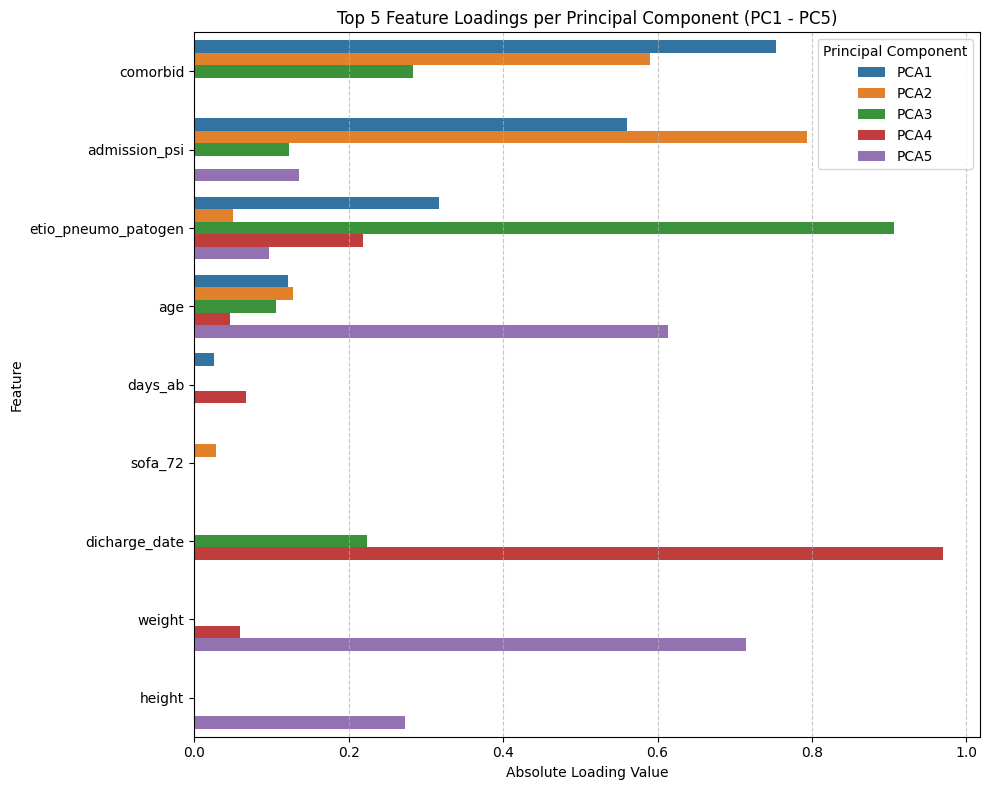

In [37]:
import seaborn as sns

# Load your PCA components CSV
components_df = pd.read_csv("components.csv", index_col=0)

# Rename the row indices
new_index_names = ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"]
components_df.index = new_index_names

# Choose top N features per principal component
top_n = 5
top_features_per_pc = {}

for pc in components_df.index[:5]:
    top_features = components_df.loc[pc].abs().sort_values(ascending=False).head(top_n)
    top_features_per_pc[pc] = top_features

# Prepare for plotting
top_features_df = pd.concat(top_features_per_pc).reset_index()
top_features_df.columns = ['PC', 'Feature', 'Loading']

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=top_features_df, x='Loading', y='Feature', hue='PC')
plt.title("Top 5 Feature Loadings per Principal Component (PC1 - PC5)")
plt.xlabel("Absolute Loading Value")
plt.ylabel("Feature")
plt.legend(title='Principal Component')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show();


Principal Component | Top Influential Features | Interpretation |
|-------------------|--------------------------|----------------|
PC1 | comorbid, admission_psi, etio_pneumo_patogen, age | Captures patient condition severity and comorbidity—likely distinguishing patients with complex health profiles. Comorbidity refers to the simultaneous presence of two or more medical conditions in a patient.
PC2 | admission_psi, comorbid, age, sofa_72 | Emhasizes clinical scores(sofa 72) and patient age—important for assessing initial health status.
PC3 | etio_pneumo_patogen, comorbid, dicharge_date | Focuses on pneumonia pathogen types and comorbidity—relevant to diagnosis and outcome.
PC4 | dicharge_date, etio_pneumo_patogen, days_ab, weight | Captures discharge-related info and antibiotic days—indicative of treatment duration or recovery time.
PC5 | age, weight, height, etio_pneumo_patogen | Likely represents demographic and anthropometric variability.